
<h1><center> Tableau de bord sur le Covid </center></h1>

### Contexte du projet

Réalisation d'un tableau de bord en ligne pour pouvoir suivre les indicateurs sur le Covid-19.

## Données : 

mon jeu de données comporte les informations suivantes :    
           
           
         
    Les données hospitalières relatives à l'épidémie du COVID-19:

            dep = par département 

            sexe =sexe du patient 

            hosp :nombre de patients hospitalisés 

            rea : nombre de personnes actuellement en réanimation ou soins intensifs

            rad : nombre cumulé de personnes retournées à domicile

            dc : nombre cumulé de personnes décédées. 

       
Chaque département , affiche les données par sexe(=>3 lignes par département).


    1=> homme
    2=> femme
    0=> total

## Modalités pédagogiques

Le projet consiste en la réalisation d'un dashboard à partir des datasets sur le Covid-19. Pour cela, j'ai utilisé le csv du site #source https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/ que j'ai d'abord transformé en excel afin d'afficher quelques indicateurs qui m'ont paru intéressants. Ces tableaux de bord sont à effectuer ponctuellement et de manière hebdomadaire afin de remonter aux régions ces indicateurs pour mieux appréhender la situation sanitaire.  Pour commencer, j'ai créé un data frame pour chaque région que j'ai utilisé pour mes tableaux de bord.
Ensuite, j'ai calculé ;
 * **Moyenne**
 * **Ecart-type**
 * **Médiane**
 * **Min**
 * **Max**
 
Sur la même feuille j'ai présenté une matrice des coefficients de corrélation de Pearson calculé par python, cette matrice nous permet de voir que les retours à domicile sont fortement corrélés aux décès et une très faible corrélation entre les déces et le sexe des personnes malades.

Dans une deuxième feuille, j'ai réalisé un graph qui montre le **nombre de personnes par catégorie** n'étant pas très satisfaite de ce graph, j'ai réalisé via python des graph en barres de certains indicateur. J'ai fait ce travail pour les région ci-dessous : 
 * 84	Auvergne-Rhône-Alpes
 * 11	Ile-de-France
 * 1	Guadeloupe
 * 2	Martinique
 * 3	Guyane
 * 53	Bretagne


In [2]:
# Chargement des librairies

from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd 
import matplotlib.pyplot as plt
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import FORMULAE
from openpyxl.formula.translate import Translator
from openpyxl.chart import BarChart, Reference
from openpyxl.styles import Font, Color, Alignment, Border, Side, colors
from itertools import islice
from pandas import DataFrame
from openpyxl.drawing.image import Image
import seaborn as sb; sb.set(style="white", color_codes=True)
import matplotlib.pyplot as plt
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment



In [3]:
# Chargement du fichier
workbook = load_workbook(filename="data_covid.xlsx")

# Afficher les noms des feuilles
workbook.sheetnames

FileNotFoundError: [Errno 2] No such file or directory: 'data_covid.xlsx'

In [ ]:
sheet = workbook['data ']
sheet
sheet.title

In [65]:
# Afficher les données de l'excel en format Dataframe

data = sheet.values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r,1,None) for r in data)
df = DataFrame(data, index=idx, columns=cols)
df

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
1,0,43908,2,0,1,0,84,Ain,Auvergne-Rhône-Alpes
1,1,43908,1,0,1,0,84,Ain,Auvergne-Rhône-Alpes
1,2,43908,1,0,0,0,84,Ain,Auvergne-Rhône-Alpes
2,0,43908,41,10,18,11,32,Aisne,Hauts-de-France
2,1,43908,19,4,11,6,32,Aisne,Hauts-de-France
...,...,...,...,...,...,...,...,...,...
974,1,44217,26,6,371,26,4,La Réunion,La Réunion
974,2,44217,20,0,381,28,4,La Réunion,La Réunion
976,0,44217,13,4,568,44,6,Mayotte,Mayotte
976,1,44217,4,3,275,27,6,Mayotte,Mayotte


<h1><center> Tableau de bord sur le Covid, Auvergne-Rhône-Alpes. </center></h1>

In [66]:
# Afficher le dataframe de la region 84
df_84 = df[df['region_code'] == 84]
df_84

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
1,0,43908,2,0,1,0,84,Ain,Auvergne-Rhône-Alpes
1,1,43908,1,0,1,0,84,Ain,Auvergne-Rhône-Alpes
1,2,43908,1,0,0,0,84,Ain,Auvergne-Rhône-Alpes
3,0,43908,4,0,1,0,84,Allier,Auvergne-Rhône-Alpes
3,1,43908,1,0,0,0,84,Allier,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...
73,1,44217,86,14,952,301,84,Savoie,Auvergne-Rhône-Alpes
73,2,44217,51,5,975,222,84,Savoie,Auvergne-Rhône-Alpes
74,0,44217,271,27,3271,701,84,Haute-Savoie,Auvergne-Rhône-Alpes
74,1,44217,126,20,1715,423,84,Haute-Savoie,Auvergne-Rhône-Alpes


In [67]:
# Enregistrer dans un excel le dataframe de la region 84

workbook = Workbook()

for r in dataframe_to_rows(df_84, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_84'
workbook.save(filename="data_covid84_Auvergne-Rhône-Alpes.xlsx")



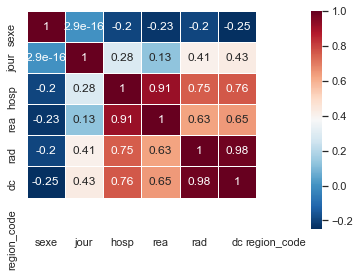

In [68]:
# Tableau de bord statistiques descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_84']
sh = workbook.create_sheet("data_84_form", -1) 

# couleur cellule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur cellule titre

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"


#Calculs excel 

sh["B3"] =Translator("=ROUND(AVERAGE(covid_84!C1:covid_84!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_84!D1:covid_84!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_84!E1:covid_84!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_84!F1:covid_84!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_84!C1:covid_84!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_84!D1:covid_84!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_84!E1:covid_84!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_84!F1:covid_84!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_84!C1:covid_84!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_84!D1:covid_84!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_84!E1:covid_84!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_84!F1:covid_84!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_84!C1:covid_84!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_84!D1:covid_84!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_84!E1:covid_84!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_84!F1:covid_84!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_84!C1:covid_84!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_84!D1:covid_84!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_84!E1:covid_84!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_84!F1:covid_84!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearson 


pearson = df_84.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr84.png', dpi=72)
img = Image('AnscombeCorr84.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid84_Auvergne-Rhône-Alpes.xlsx")

In [69]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_84_graph", -1) 
sh_covid = workbook['covid_84']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid84_Auvergne-Rhône-Alpes.xlsx")

C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


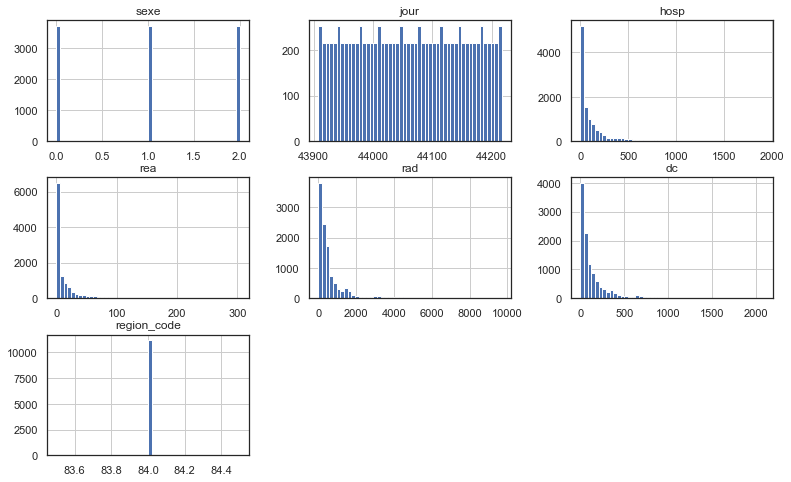

In [70]:
# Afficher quelques indicateurs 

import matplotlib.pyplot as plt
df_84.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe84.png', dpi=72)
img = Image('Anscombe84.png')
shimg = workbook.create_sheet("data_84_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid84_Auvergne-Rhône-Alpes.xlsx")


<h1><center> Tableau de bord sur le Covid, région Ile de France </center></h1>

In [71]:
# Afficher le dataframe de la region 11 Ile de France 
df_11 = df[df['region_code'] == 11]
df_11

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
75,0,43908,359,105,40,14,11,Paris,Ile-de-France
75,1,43908,217,70,22,10,11,Paris,Ile-de-France
75,2,43908,139,35,18,4,11,Paris,Ile-de-France
77,0,43908,25,13,10,0,11,Seine-et-Marne,Ile-de-France
77,1,43908,15,12,6,0,11,Seine-et-Marne,Ile-de-France
...,...,...,...,...,...,...,...,...,...
94,1,44217,243,38,4359,1126,11,Val-de-Marne,Ile-de-France
94,2,44217,289,21,4144,816,11,Val-de-Marne,Ile-de-France
95,0,44217,453,34,5323,1276,11,Val-d'Oise,Ile-de-France
95,1,44217,211,29,2879,788,11,Val-d'Oise,Ile-de-France


In [72]:
# Enregistrer dans un excel le dataframe de la region 11 Ile de France

workbook = Workbook()

for r in dataframe_to_rows(df_11, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_11'
workbook.save(filename="data_covid11_Ile-de-France.xlsx")



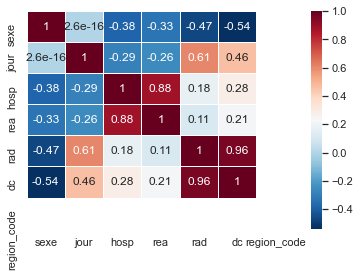

In [73]:
# Tableau de bord statistiques descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_11']
sh = workbook.create_sheet("data_11_form", -1) 

# couleur cellule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur cellule ligne

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"



sh["B3"] =Translator("=ROUND(AVERAGE(covid_11!C1:covid_11!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_11!D1:covid_11!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_11!E1:covid_11!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_11!F1:covid_11!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_11!C1:covid_11!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_11!D1:covid_11!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_11!E1:covid_11!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_11!F1:covid_11!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_11!C1:covid_11!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_11!D1:covid_11!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_11!E1:covid_11!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_11!F1:covid_11!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_11!C1:covid_11!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_11!D1:covid_11!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_11!E1:covid_11!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_11!F1:covid_11!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_11!C1:covid_11!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_11!D1:covid_11!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_11!E1:covid_11!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_11!F1:covid_11!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearon 


pearson = df_11.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr11.png', dpi=72)
img = Image('AnscombeCorr11.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid11_Ile-de-France.xlsx")


In [74]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_11_graph", -1) 
sh_covid = workbook['covid_11']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid11_Ile-de-France.xlsx")

C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


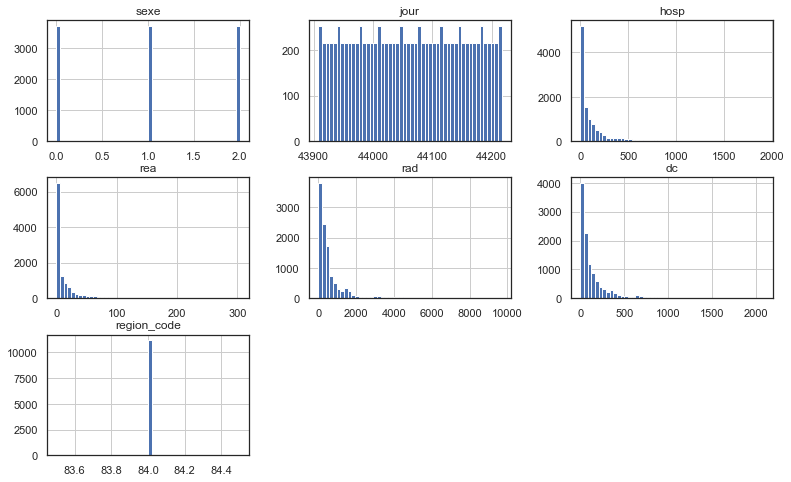

In [75]:
#Afficher quelques indicateurs 

import matplotlib.pyplot as plt
df_84.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe11.png', dpi=72)
img = Image('Anscombe11.png')
shimg = workbook.create_sheet("data_84_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid11_Ile-de-France.xlsx")


<h1><center> Tableau de bord sur le Covid, Guadeloupe. </center></h1>

In [76]:
# Afficher le dataframe de la region 1
df_1 = df[df['region_code'] == 1]
df_1

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
971,0,43908,0,0,0,0,1,Guadeloupe,Guadeloupe
971,1,43908,0,0,0,0,1,Guadeloupe,Guadeloupe
971,2,43908,0,0,0,0,1,Guadeloupe,Guadeloupe
971,0,43909,0,0,0,0,1,Guadeloupe,Guadeloupe
971,1,43909,0,0,0,0,1,Guadeloupe,Guadeloupe
...,...,...,...,...,...,...,...,...,...
971,1,44216,32,5,441,102,1,Guadeloupe,Guadeloupe
971,2,44216,16,0,339,67,1,Guadeloupe,Guadeloupe
971,0,44217,46,5,784,169,1,Guadeloupe,Guadeloupe
971,1,44217,30,4,442,102,1,Guadeloupe,Guadeloupe


In [77]:
# Enregistrer dans un excel le dataframe de la region 1

workbook = Workbook()

for r in dataframe_to_rows(df_1, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_1'
workbook.save(filename="data_covid1_Guadeloupe.xlsx")



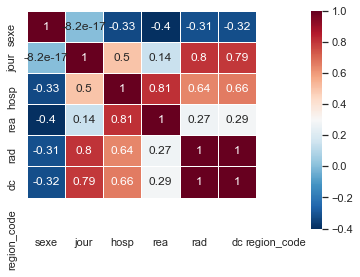

In [78]:
# Tableau de bord statistique descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_1']
sh = workbook.create_sheet("data_1_form", -1) 

# couleur celule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur celule ligne

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"



sh["B3"] =Translator("=ROUND(AVERAGE(covid_1!C1:covid_1!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_1!D1:covid_1!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_1!E1:covid_1!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_1!F1:covid_1!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_1!C1:covid_1!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_1!D1:covid_1!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_1!E1:covid_1!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_1!F1:covid_1!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_1!C1:covid_1!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_1!D1:covid_1!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_1!E1:covid_1!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_1!F1:covid_1!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_1!C1:covid_1!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_1!D1:covid_1!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_1!E1:covid_1!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_1!F1:covid_1!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_1!C1:covid_1!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_1!D1:covid_1!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_1!E1:covid_1!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_1!F1:covid_1!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearon 


pearson = df_1.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr1.png', dpi=72)
img = Image('AnscombeCorr1.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid1_Guadeloupe.xlsx")


In [79]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_1_graph", -1) 
sh_covid = workbook['covid_1']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid1_Guadeloupe.xlsx")

C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


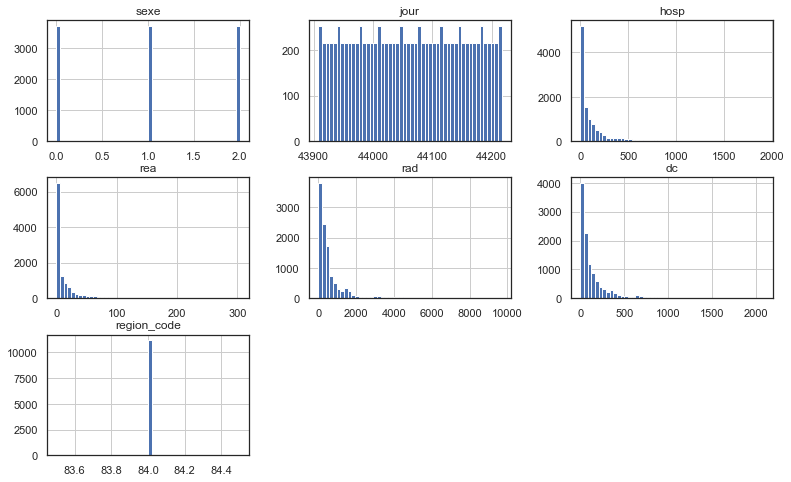

In [80]:
import matplotlib.pyplot as plt
df_84.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe1.png', dpi=72)
img = Image('Anscombe1.png')
shimg = workbook.create_sheet("data_1_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid1_Guadeloupe.xlsx")


<h1><center> Tableau de bord sur le Covid, Martinique. </center></h1>

In [81]:
# Afficher le dataframe de la region 2
df_2 = df[df['region_code'] == 2]
df_2

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
972,0,43908,16,5,0,1,2,Martinique,Martinique
972,1,43908,9,3,0,0,2,Martinique,Martinique
972,2,43908,7,2,0,1,2,Martinique,Martinique
972,0,43909,17,5,0,1,2,Martinique,Martinique
972,1,43909,9,3,0,0,2,Martinique,Martinique
...,...,...,...,...,...,...,...,...,...
972,1,44216,7,2,194,29,2,Martinique,Martinique
972,2,44216,7,1,182,15,2,Martinique,Martinique
972,0,44217,13,2,379,44,2,Martinique,Martinique
972,1,44217,7,2,195,29,2,Martinique,Martinique


In [82]:
# Enregistrer dans un excel le dataframe de la region 2

workbook = Workbook()

for r in dataframe_to_rows(df_2, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_2'
workbook.save(filename="data_covid2_Martinique.xlsx")



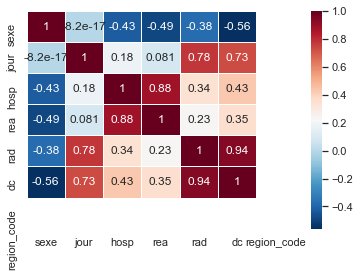

In [83]:
# Tableau de bord statistique descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_2']
sh = workbook.create_sheet("data_2_form", -1) 

# couleur celule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur celule ligne

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"



sh["B3"] =Translator("=ROUND(AVERAGE(covid_2!C1:covid_2!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_2!D1:covid_2!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_2!E1:covid_2!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_2!F1:covid_2!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_2!C1:covid_2!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_2!D1:covid_2!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_2!E1:covid_2!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_2!F1:covid_2!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_2!C1:covid_2!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_2!D1:covid_2!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_2!E1:covid_2!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_2!F1:covid_2!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_2!C1:covid_2!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_2!D1:covid_2!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_2!E1:covid_2!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_2!F1:covid_2!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_2!C1:covid_2!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_2!D1:covid_2!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_2!E1:covid_2!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_2!F1:covid_2!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearon 


pearson = df_2.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr2.png', dpi=72)
img = Image('AnscombeCorr2.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid2_Martinique.xlsx")


In [84]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_2_graph", -1) 
sh_covid = workbook['covid_2']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid2_Martinique.xlsx")


C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


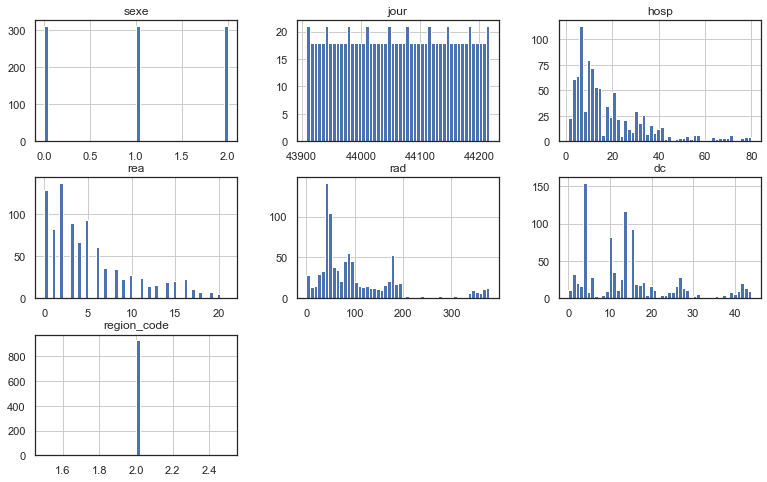

In [85]:
import matplotlib.pyplot as plt
df_2.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe2.png', dpi=72)
img = Image('Anscombe2.png')
shimg = workbook.create_sheet("data_2_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid2_Martinique.xlsx")



<h1><center> Tableau de bord sur le Covid, Bretagne. </center></h1>

In [86]:
# Afficher le dataframe de la region 53
df_53 = df[df['region_code'] == 53]
df_53


,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
22,0,43908,1,1,3,0,53,CÃ´tes-d'Armor,Bretagne
22,1,43908,1,1,1,0,53,CÃ´tes-d'Armor,Bretagne
22,2,43908,0,0,2,0,53,CÃ´tes-d'Armor,Bretagne
29,0,43908,13,5,3,0,53,FinistÃ¨re,Bretagne
29,1,43908,8,4,2,0,53,FinistÃ¨re,Bretagne
...,...,...,...,...,...,...,...,...,...
35,1,44217,135,16,798,176,53,Ille-et-Vilaine,Bretagne
35,2,44217,157,3,714,158,53,Ille-et-Vilaine,Bretagne
56,0,44217,163,7,1042,233,53,Morbihan,Bretagne
56,1,44217,79,3,533,139,53,Morbihan,Bretagne


In [87]:
# Enregistrer dans un excel le dataframe de la region 53

workbook = Workbook()

for r in dataframe_to_rows(df_53, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_53'
workbook.save(filename="data_covid53_Bretagne.xlsx")



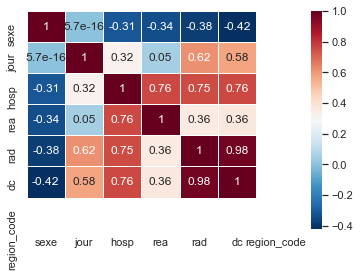

In [88]:
# Tableau de bord statistique descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_53']
sh = workbook.create_sheet("data_53_form", -1) 

# couleur celule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur celule ligne

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"



sh["B3"] =Translator("=ROUND(AVERAGE(covid_53!C1:covid_53!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_53!D1:covid_53!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_53!E1:covid_53!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_53!F1:covid_53!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_53!C1:covid_53!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_53!D1:covid_53!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_53!E1:covid_53!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_53!F1:covid_53!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_53!C1:covid_53!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_53!D1:covid_53!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_53!E1:covid_53!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_53!F1:covid_53!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_53!C1:covid_53!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_53!D1:covid_53!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_53!E1:covid_53!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_53!F1:covid_53!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_53!C1:covid_53!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_53!D1:covid_53!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_53!E1:covid_53!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_53!F1:covid_53!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearon 


pearson = df_53.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr53.png', dpi=72)
img = Image('AnscombeCorr53.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid53_Bretagne.xlsx")


In [89]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_53_graph", -1) 
sh_covid = workbook['covid_53']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid53_Bretagne.xlsx")


C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


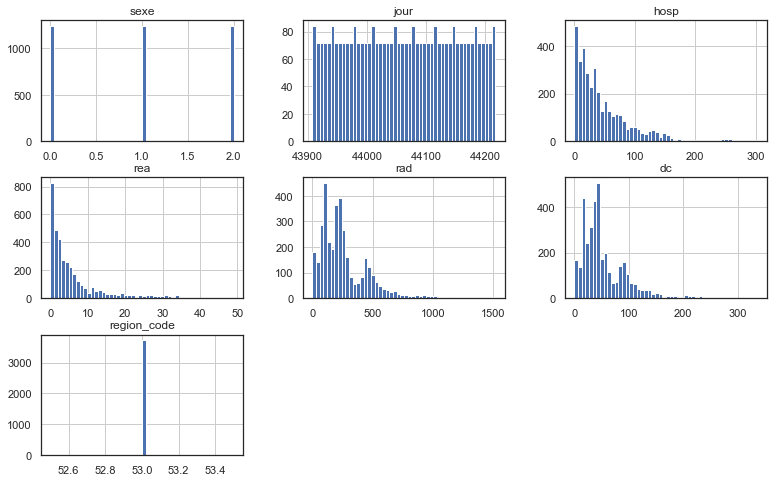

In [90]:
import matplotlib.pyplot as plt
df_53.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe53.png', dpi=72)
img = Image('Anscombe53.png')
shimg = workbook.create_sheet("data_53_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid53_Bretagne.xlsx")



<h1><center> Tableau de bord sur le Covid, Guyane. </center></h1>

In [91]:
# Afficher le dataframe de la region 3
df_3 = df[df['region_code'] == 3]
df_3

,sexe,jour,hosp,rea,rad,dc,region_code,dep_name,region
973,0,43908,0,0,0,0,3,Guyane,Guyane
973,1,43908,0,0,0,0,3,Guyane,Guyane
973,2,43908,0,0,0,0,3,Guyane,Guyane
973,0,43909,0,0,0,0,3,Guyane,Guyane
973,1,43909,0,0,0,0,3,Guyane,Guyane
...,...,...,...,...,...,...,...,...,...
973,1,44216,22,6,828,49,3,Guyane,Guyane
973,2,44216,26,3,1231,23,3,Guyane,Guyane
973,0,44217,47,12,2068,72,3,Guyane,Guyane
973,1,44217,24,8,831,49,3,Guyane,Guyane


In [92]:
# Enregistrer dans un excel le dataframe de la region 3

workbook = Workbook()

for r in dataframe_to_rows(df_3, index=False, header=True):
    workbook.active.append(r)
    workbook.active.title = 'covid_3'
workbook.save(filename="data_covid3_Guyane.xlsx")



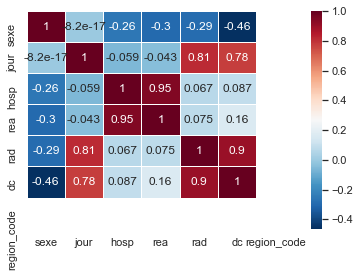

In [93]:
# Tableau de bord statistique descriptives via des formules excel 

bold_font_title = Font(bold=True,size=14)
bold_font = Font(bold=True,size=10)
center_aligned_text = Alignment(horizontal="center")
double_border_side = Side(border_style="double")
square_border = Border(top=double_border_side,
right=double_border_side,
bottom=double_border_side,
left=double_border_side)
    
cus_sheet = workbook['covid_3']
sh = workbook.create_sheet("data_3_form", -1) 

# couleur celule titre

sh["A2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["B2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["C2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["D2"].fill = PatternFill("solid", fgColor="0000FFFF")
sh["E2"].fill = PatternFill("solid", fgColor="0000FFFF")

# couleur celule ligne

sh["A3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D3"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E3"].fill = PatternFill("solid", fgColor="00CCFFFF")


sh["A5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D5"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E5"].fill = PatternFill("solid", fgColor="00CCFFFF")

sh["A7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["B7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["C7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["D7"].fill = PatternFill("solid", fgColor="00CCFFFF")
sh["E7"].fill = PatternFill("solid", fgColor="00CCFFFF")



#Styles des titres : 

sh['A1'].font = bold_font_title
sh['H1'].font = bold_font_title

#Style cellules : 

sh["B2"].font = bold_font
sh["C2"].font = bold_font
sh["D2"].font = bold_font
sh["E2"].font = bold_font

sh["A3"].font = bold_font
sh["A4"].font = bold_font
sh["A5"].font = bold_font
sh["A6"].font = bold_font
sh["A7"].font = bold_font

#Ajuster la taille des cellules


#Afficher le styles de cellule calcul 

sh["B3"].alignment = center_aligned_text
sh["C3"].alignment = center_aligned_text
sh["D3"].alignment = center_aligned_text
sh["E3"].alignment = center_aligned_text

sh["B4"].alignment = center_aligned_text
sh["C4"].alignment = center_aligned_text
sh["D4"].alignment = center_aligned_text
sh["E4"].alignment = center_aligned_text

sh["B5"].alignment = center_aligned_text
sh["C5"].alignment = center_aligned_text
sh["D5"].alignment = center_aligned_text
sh["E5"].alignment = center_aligned_text

sh["B6"].alignment = center_aligned_text
sh["C6"].alignment = center_aligned_text
sh["D6"].alignment = center_aligned_text
sh["E6"].alignment = center_aligned_text

sh["B7"].alignment = center_aligned_text
sh["C7"].alignment = center_aligned_text
sh["D7"].alignment = center_aligned_text
sh["E7"].alignment = center_aligned_text


#Afficher les titre colones/lignes 

sh['B2'] = "Hospitalisation (nb/jour)"
sh['C2'] = "réanimation (nb/jour)"
sh['D2'] = "retour à domicile (nb/jour)"
sh['E2'] = "décés (nb/jour)"

sh['A3'] = "Moyenne"
sh['A4'] = "Ecart-type"
sh['A5'] = "Médiane"
sh['A6'] = "Min"
sh['A7'] = "Max"

sh['H1'] = "Coefficient de corrélation de Pearson"
sh['A1'] = "Tableau de bord : quelques paramètres"



sh["B3"] =Translator("=ROUND(AVERAGE(covid_3!C1:covid_3!C11200),0)", origin="B3").translate_formula("B3")
sh["C3"] =Translator("=ROUND(AVERAGE(covid_3!D1:covid_3!D11200),0)", origin="C3").translate_formula("C3")
sh["D3"] =Translator("=ROUND(AVERAGE(covid_3!E1:covid_3!E11200),0)", origin="D3").translate_formula("E3")
sh["E3"] =Translator("=ROUND(AVERAGE(covid_3!F1:covid_3!F11200),0)", origin="E3").translate_formula("F3")

sh["B4"] = Translator("=ROUND(STDEVP(covid_3!C1:covid_3!C11200),0)", origin="B4").translate_formula("B4")
sh["C4"] = Translator("=ROUND(STDEVP(covid_3!D1:covid_3!D11200),0)", origin="C4").translate_formula("C4")
sh["D4"] = Translator("=ROUND(STDEVP(covid_3!E1:covid_3!E11200),0)", origin="D4").translate_formula("D4")
sh["E4"] = Translator("=ROUND(STDEVP(covid_3!F1:covid_3!F11200),0)", origin="E4").translate_formula("E4")


sh["B5"] = Translator("=MEDIAN(covid_3!C1:covid_3!C11200)", origin="B5").translate_formula("B5")
sh["C5"] = Translator("=MEDIAN(covid_3!D1:covid_3!D11200)", origin="C5").translate_formula("C5")
sh["D5"] = Translator("=MEDIAN(covid_3!E1:covid_3!E11200)", origin="D5").translate_formula("D5")
sh["E5"] = Translator("=MEDIAN(covid_3!F1:covid_3!F11200)", origin="E5").translate_formula("E5")

sh["B6"] = Translator("=MIN(covid_3!C1:covid_3!C11200)", origin="B6").translate_formula("B6")
sh["C6"] = Translator("=MIN(covid_3!D1:covid_3!D11200)", origin="C6").translate_formula("C6")
sh["D6"] = Translator("=MIN(covid_3!E1:covid_3!E11200)", origin="D6").translate_formula("D6")
sh["E6"] = Translator("=MIN(covid_3!F1:covid_3!F11200)", origin="E6").translate_formula("E6")

sh["B7"] = Translator("=MAX(covid_3!C1:covid_3!C11200)", origin="B7").translate_formula("B7")
sh["C7"] = Translator("=MAX(covid_3!D1:covid_3!D11200)", origin="C7").translate_formula("C7")
sh["D7"] = Translator("=MAX(covid_3!E1:covid_3!E11200)", origin="D7").translate_formula("D7")
sh["E7"] = Translator("=MAX(covid_3!F1:covid_3!F11200)", origin="E7").translate_formula("E7")

DataFrame(sh.values)

# Matrice de correlation pearon 


pearson = df_3.corr(method='pearson')

sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


plt.savefig('AnscombeCorr3.png', dpi=72)
img = Image('AnscombeCorr3.png')
 
sh.add_image(img, 'H3')

sh = workbook.active
workbook.save(filename="data_covid3_Guyane.xlsx")


In [94]:
# Création d'un graph excel 

sh_covid_graph = workbook.create_sheet("data_3_graph", -1) 
sh_covid = workbook['covid_3']
graph = BarChart()

graph.title = "Nombre de personnes par catégorie"
graph.y_axis.title = 'Nombre de personnes'
graph.x_axis.title = 'Nombre de personnes'

data = Reference(sh_covid, min_row=1, max_row=11200, min_col=3, max_col=6)

graph.add_data(data, titles_from_data=True)

sh_covid_graph.add_chart(graph, "A2")

workbook.save("data_covid3_Guyane.xlsx")


C:\Users\Nassima YOUSFI\anaconda3\envs\nassima\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


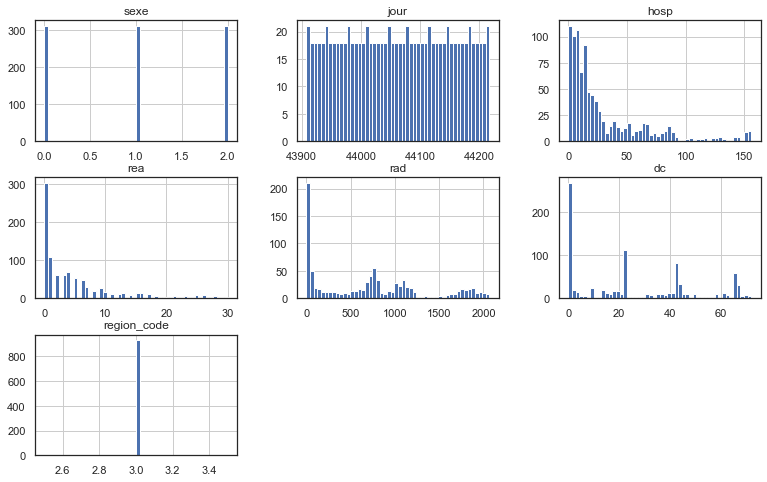

In [95]:
import matplotlib.pyplot as plt
df_3.hist(bins=50, figsize=(13,8))
plt.savefig('Anscombe3.png', dpi=72)
img = Image('Anscombe3.png')
shimg = workbook.create_sheet("data_3_indicateurs", -1) 
shimg.add_image(img, 'A1')
workbook.save(filename="data_covid3_Guyane.xlsx")
